<a href="https://colab.research.google.com/github/camilacruz-cs/IA-para-Dados/blob/main/Projeto2_An%C3%A1lise_de_Sentimentos_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Produto à ser analisado:
- Liquidificador portátil
- Função: Preparar suplementos pós-treino e sucos

### Etapas para serem seguidas:

- Instalar a biblioteca pysentimiento;
- Importar a função create_analyzer para definir o modelo;
- Carregar os dados e armazenar em um DataFrame;
- Realizar a classificação na coluna que contém as resenhas feitas pelos clientes;
- Adicionar uma coluna ao DataFrame contendo os sentimentos definidos pelo modelo;
- Criar um gráfico para mostrar como estão os sentimentos dos clientes;
- Analisar os sentimentos positivos e negativos com uma nuvem de palavras (Wordcloud).

In [13]:
#Bibliotecas

!pip install pysentimiento


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="pt")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/952 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/799k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [15]:
import pandas as pd

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/hugging_face/main/Atividades/resenhas_produto.csv')

dados

,ID Cliente,Resenha
0,1918,Ele não deu conta de uma banana cortada em rod...
1,2204,Achei o produto péssimo! não consegue bater vá...
2,1176,A entrega foi realizada rapidamente. além diss...
3,1238,"Ele funciona, mas tem outras variações no merc..."
4,1878,Deixei carregando por 3hs da primeira vez. Con...
5,1292,"Ele não bate nada, raramente você consegue lig..."
6,1225,"Veio super bem embalado, bate super bem, é prá..."
7,1568,"Adorei a aquisição. Ótima potência e tamanho, ..."
8,1508,o produto superou minhas expectativas. e fácil...
9,1182,Eu não consegui usar o produto pois eu carregu...


In [16]:
dados_classificados = analyzer.predict(dados['Resenha'])


Map:   0%|          | 0/40 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: camiladacruz-cs (camiladacruz-cs-vote411) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [22]:
dados_classificados

[AnalyzerOutput(output=NEU, probas={NEU: 0.765, NEG: 0.213, POS: 0.022}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.992, NEU: 0.005, POS: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.616, NEU: 0.352, NEG: 0.032}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.949, NEG: 0.039, POS: 0.012}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.538, NEU: 0.368, POS: 0.093}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.024, POS: 0.013}),
 AnalyzerOutput(output=POS, probas={POS: 0.992, NEU: 0.006, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.988, NEU: 0.010, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.948, NEU: 0.047, NEG: 0.006}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.681, NEU: 0.296, POS: 0.023}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005}),
 AnalyzerOutput(output=POS, probas={POS: 0.993, NEU: 0.006, NEG: 0.002}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.962, POS: 0.021, NEU: 0.017}),
 AnalyzerOutput(output=POS, probas={PO

In [23]:
sentimento = []

for resultado in dados_classificados:
  sentimento.append(resultado.output)

In [27]:
dados['Sentimento'] = sentimento

dados

,ID Cliente,Resenha,Sentimento
0,1918,Ele não deu conta de uma banana cortada em rod...,NEU
1,2204,Achei o produto péssimo! não consegue bater vá...,NEG
2,1176,A entrega foi realizada rapidamente. além diss...,POS
3,1238,"Ele funciona, mas tem outras variações no merc...",NEU
4,1878,Deixei carregando por 3hs da primeira vez. Con...,NEG
5,1292,"Ele não bate nada, raramente você consegue lig...",NEG
6,1225,"Veio super bem embalado, bate super bem, é prá...",POS
7,1568,"Adorei a aquisição. Ótima potência e tamanho, ...",POS
8,1508,o produto superou minhas expectativas. e fácil...,POS
9,1182,Eu não consegui usar o produto pois eu carregu...,NEG


In [28]:
import plotly.express as px

df_sentimento = dados.groupby('Sentimento').size().reset_index(name='Contagem')

fig = px.bar(df_sentimento, x='Sentimento', y='Contagem',
             title='Contagem de Resenhas por Sentimento', text_auto=True)

fig.show()

In [29]:
import nltk
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')
portuguese_stopwords = set(stopwords.words('portuguese'))

portuguese_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def nuvem_palavras(texto, coluna_texto, sentimento):
    # Filtrando as resenhas com base no sentimento especificado
    texto_sentimento = texto.query(f"Sentimento == '{sentimento}'")[coluna_texto]

    # Unindo todas as resenhas em uma única string
    texto_unido = " ".join(texto_sentimento)

    # Dividindo o texto em palavras e filtrando com stopwords
    palavras = texto_unido.split()
    palavras_filtradas = [palavra for palavra in palavras if palavra not in portuguese_stopwords]
    texto_filtrado = " ".join(palavras_filtradas)

    # Criando e exibindo a nuvem de palavras
    nuvem_palavras = WordCloud(width=800, height=500, max_words=50).generate(texto_filtrado)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

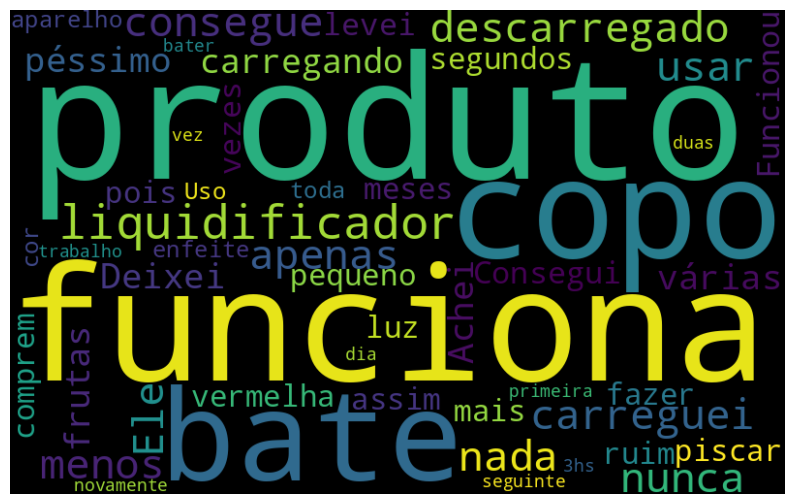

In [36]:
nuvem_palavras(dados, 'Resenha', 'NEG')

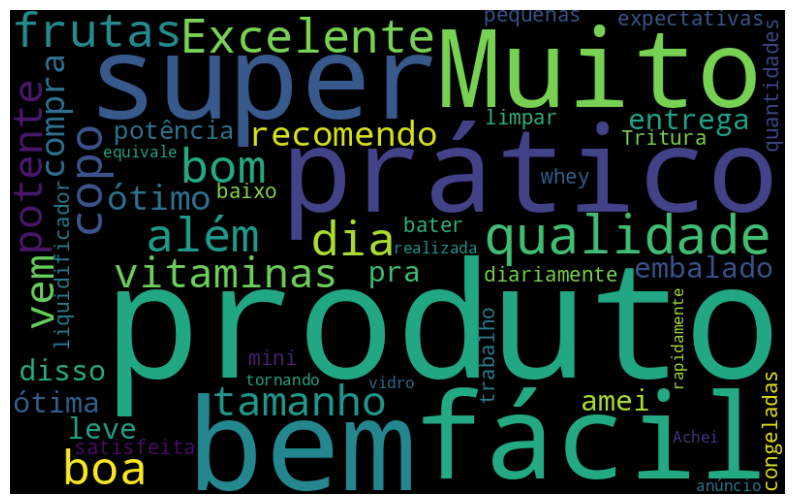

In [35]:
nuvem_palavras(dados, 'Resenha', 'POS')